In [1]:
''' autopilot for flight height control '''


' autopilot for flight height control '

# continuous steady state 

d:\Dropbox\c4dynamics\.venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


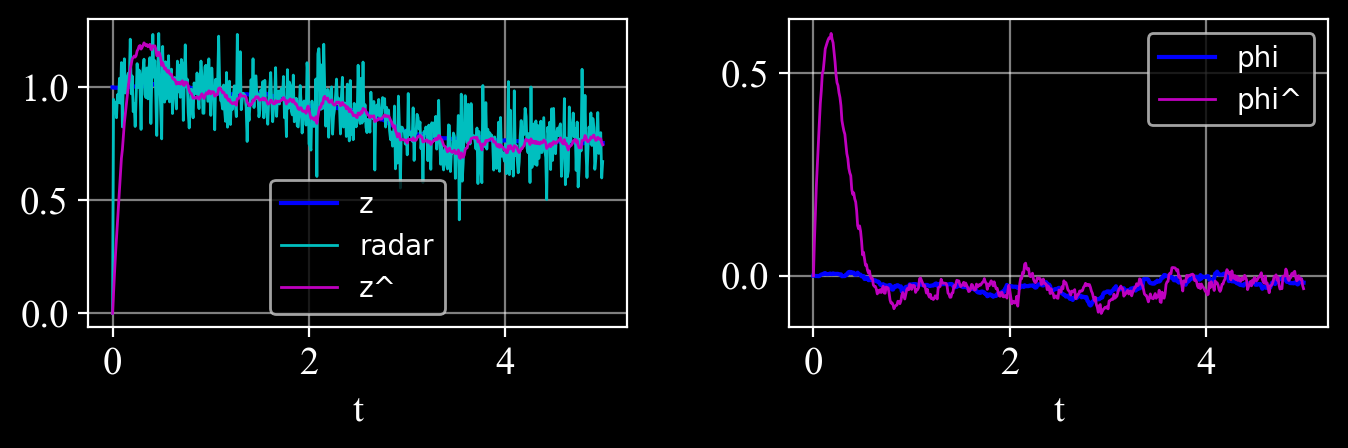

In [2]:
# import sys
# from c4dynamics.eqm.derivs import eqm3, eqm6 
import numpy as np 
import os, sys
# print(os.getcwd())
from scipy.integrate import odeint
from matplotlib import pyplot as plt 

import socket
if socket.gethostname() != 'ZivMeri-PC':
  print('changing dir')
  os.chdir('\\\\192.168.1.244\\d\\gh_repo\\c4dynamics')

import numpy as np 
import c4dynamics as c4d 
from scipy.linalg import solve_continuous_are

dt = 0.01 
tf = 5
tspan = np.arange(0, tf, dt)  

vp1 = np.sqrt(.1)
vp2 = np.sqrt(1)
Q = np.diag([vp1**2, vp2**2])

vm  = np.sqrt(.01) 
R = vm**2 

A = np.array([[0, 5], [0, -0.5]])
b = np.array([0, -0.1])
c = np.array([1, 0])

tgt = c4d.state(z = 1, phi = 0)

rdr = c4d.state(z = 0)
tgttrk = c4d.state(z = 0, phi = 0)

P = solve_continuous_are(A.T, np.atleast_2d(c).T, Q, R)
K = P @ c.T / R

def fdynamics(y, t, u = 0):
  return A @ y + b * u + np.sqrt(Q) @ np.random.randn(2, 1)

def Kdynamics(y, t, u = 0, Z = 0):
  return A @ y + b * u + np.atleast_2d(K).T * (Z - c @ y)

for t in tspan:
  
  tgt.store(t)
  tgttrk.store(t)
  rdr.store(t)

  tgt.X = odeint(fdynamics, tgt.X, [t, t + dt], args = (tgttrk.z, ))[-1]  
  rdr.z = tgt.z + vm * np.random.randn()

  
  fx = A @ tgttrk.X + b * tgttrk.z + K * (rdr.z - c @ tgttrk.X)
  tgttrk.X += fx * dt
  # tgttrk.X = odeint(Kdynamics, tgttrk.X, [t, t + dt], args = (tgt.z, rdr.z))[-1]  



# pdb.setodeint_trace()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (8, 2) 
                    , gridspec_kw = {'hspace': 0.5, 'wspace': 0.3})

ax[0].plot(*tgt.data('z'), 'b', linewidth = 1.5, label = 'z')
ax[0].plot(*rdr.data('z'), 'c', linewidth = 1, label = 'radar')
ax[0].plot(*tgttrk.data('z'), 'm', linewidth = 1, label = 'z^')
c4d.plotdefaults(ax[0], '', 't', '')
ax[0].legend()

ax[1].plot(*tgt.data('phi'), 'b', linewidth = 1.5, label = 'phi') # r'$\\varphi$'
ax[1].plot(*tgttrk.data('phi'), 'm', linewidth = 1, label = 'phi^') # r'$\\hat{\\varphi}$'
c4d.plotdefaults(ax[1], '', 't', '')
ax[1].legend()

# discrete steadystate

d:\Dropbox\c4dynamics\.venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


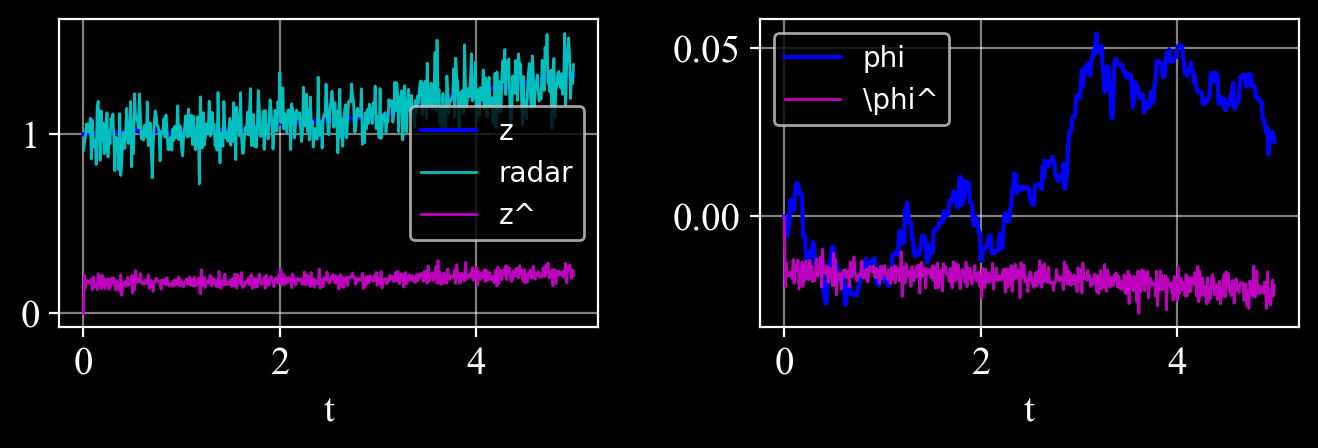

In [7]:
# import sys
# from c4dynamics.eqm.derivs import eqm3, eqm6 
import numpy as np 
import os, sys
# print(os.getcwd())
from scipy.integrate import odeint
from matplotlib import pyplot as plt 

import socket
if socket.gethostname() != 'ZivMeri-PC':
  print('changing dir')
  os.chdir('\\\\192.168.1.244\\d\\gh_repo\\c4dynamics')


import numpy as np 
import c4dynamics as c4d 

dt = 0.01 
tf = 5
tspan = np.arange(0, tf, dt)  

vp1 = np.sqrt(.1)
vp2 = np.sqrt(1)
Q = np.diag([vp1**2, vp2**2])

vm  = np.sqrt(.01) 
R = vm**2 

P0 = np.zeros(2)
P0 = np.diag([1, 0])

A = np.array([[0, 5], [0, -0.5]])
b = np.array([0, -0.1])
H = np.array([1, 0])


# kf = c4d.filters.kalman(p0 = P0, Q = Q, R = R, dt = dt, steadystate = True)

kf = c4d.filters.kalman(P0 = P0, F = A + np.eye(2) * dt 
                          , Q = Q * dt, H = H, R = R / dt, b = b * dt
                            , dt = dt, steadystate = True)

rdr = c4d.sensors.seeker(rng_noise_std = vm)
tgt = c4d.rigidbody(z = 1, phi = 0)
tgttrk = c4d.rigidbody()

# Y = [1, 0]


# process dynamics 
def fdynamics(y, t, u = 0):

  # dz   =  5 * y[1] + vp1 * np.random.randn()
  # # print(f'{y=} {u=} {vp2=}')
  # dphi = -0.5 * y[1] - 0.1 * u + vp2 * np.random.randn()

  # return [dz, dphi]
  # print(f'{A@y.reshape(2, 1)=} {b*u=}')
  # print(A @ y.reshape(2, 1) + b * u + np.sqrt(Q) @ np.random.randn(2, 1))
  # print(np.squeeze(A @ y.reshape(2, 1) + b * u + np.sqrt(Q) @ np.random.randn(2, 1)))
  # return A @ y.reshape(2, 1) + b * u + np.sqrt(Q) @ np.random.randn(2, 1)
  return A @ y + b * u + np.sqrt(Q) @ np.random.randn(2, 1)

Z = 0

for t in tspan:
  # print(f' ')
  # print(f' ')
  # print(f'{t=}')
  
  tgt.store(t)
  tgttrk.store(t)

  tgt.z, tgt.phi = odeint(fdynamics, [tgt.z, tgt.phi], [t, t + dt], args = (tgttrk.z, ))[-1]  
  _, _, Z, _ = rdr.measure(tgt, t = t, store = True)

  
  # tgttrk.z, tgttrk.phi = kf.predict([tgttrk.z, tgttrk.phi])
  # print(f'{tgttrk.z=} {tgttrk.phi=}')
  # tgttrk.z, tgttrk.phi = kf.update([tgttrk.z, tgttrk.phi], Z)
  # print(f'{tgttrk.z=} {tgttrk.phi=}')
  tgttrk.z, tgttrk.phi = kf.update(kf.predict([tgttrk.z, tgttrk.phi], u = tgttrk.z), Z)
  # print(f'{tgttrk.z=} {tgttrk.phi=}')




# pdb.set_trace()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (8, 2) 
                    , gridspec_kw = {'hspace': 0.5, 'wspace': 0.3})

ax[0].plot(*tgt.data('z'), 'b', linewidth = 1.5, label = 'z')
ax[0].plot(*rdr.data('range'), 'c', linewidth = 1, label = 'radar')
ax[0].plot(*tgttrk.data('z'), 'm', linewidth = 1, label = 'z^')
c4d.plotdefaults(ax[0], '', 't', '')
ax[0].legend()

ax[1].plot(*tgt.data('phi'), 'b', linewidth = 1.5, label = 'phi')
ax[1].plot(*tgttrk.data('phi'), 'm', linewidth = 1, label = '\\varphi^')
c4d.plotdefaults(ax[1], '', 't', '')
ax[1].legend()

plt.show()

d:\Dropbox\c4dynamics\.venv\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


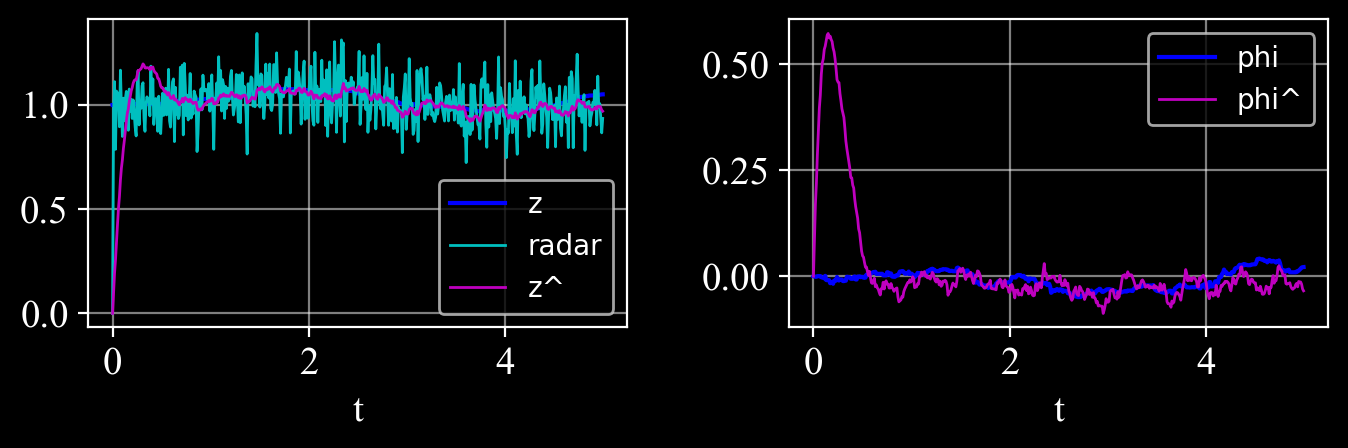

In [4]:
# import sys
# from c4dynamics.eqm.derivs import eqm3, eqm6 
import numpy as np 
import os, sys
# print(os.getcwd())
from scipy.integrate import odeint
from matplotlib import pyplot as plt 

import socket
if socket.gethostname() != 'ZivMeri-PC':
  print('changing dir')
  os.chdir('\\\\192.168.1.244\\d\\gh_repo\\c4dynamics')

import numpy as np 
import c4dynamics as c4d 
from scipy.linalg import solve_discrete_are

dt = 0.01 
tf = 5
tspan = np.arange(0, tf, dt)  

vp1 = np.sqrt(.1)
vp2 = np.sqrt(1)
Q = np.diag([vp1**2, vp2**2])

vm  = np.sqrt(.01) 
R = vm**2 



A = np.array([[0, 5], [0, -0.5]])
b = np.array([0, -0.1])
c = np.array([1, 0])


''' 
for the relation between discrete and continuous quantities see simon 
chapter 1 pg 27 (48)
chapter 8 pp 231-232 (246-7)



F = exp(A*dt) ~ I + A*dt
G = F*(I-exp(-A*dt))*A^-1*b ~ b*dt 

Qc = Q/dt
Rc = R*dt

'''

F = np.eye(len(A)) + A * dt
g = b * dt
H = np.atleast_2d(c)

Qd = Q * dt
Rd = R / dt

tgt = c4d.state(z = 1, phi = 0)

rdr = c4d.state(z = 0)
tgttrk = c4d.state(z = 0, phi = 0)

Pc = solve_discrete_are(F.T, H.T, Qd, Rd)
K = Pc @ H.T @ np.linalg.inv(H @ Pc @ H.T + Rd)



def fdynamics(y, t, u = 0):
  return A @ y + b * u + np.sqrt(Q) @ np.random.randn(2, 1)


for t in tspan:
  
  tgt.store(t)
  tgttrk.store(t)
  rdr.store(t)

  tgt.X = odeint(fdynamics, tgt.X, [t, t + dt], args = (tgttrk.z, ))[-1]  
  rdr.z = tgt.z + vm * np.random.randn()

# tgttrk.X += (A @ tgttrk.X + b.flatten() * tgttrk.z + K * (rdr.z - H @ tgttrk.X)) * dt
  tgttrk.X  =  F @ tgttrk.X + g.flatten() * tgttrk.z + K.flatten() * (rdr.z - H @ tgttrk.X)
   


# pdb.set_trace()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (8, 2) 
                    , gridspec_kw = {'hspace': 0.5, 'wspace': 0.3})

ax[0].plot(*tgt.data('z'), 'b', linewidth = 1.5, label = 'z')
ax[0].plot(*rdr.data('z'), 'c', linewidth = 1, label = 'radar')
ax[0].plot(*tgttrk.data('z'), 'm', linewidth = 1, label = 'z^')
c4d.plotdefaults(ax[0], '', 't', '')
ax[0].legend()

ax[1].plot(*tgt.data('phi'), 'b', linewidth = 1.5, label = 'phi') # r'$\\varphi$'
ax[1].plot(*tgttrk.data('phi'), 'm', linewidth = 1, label = 'phi^') # r'$\\hat{\\varphi}$'
c4d.plotdefaults(ax[1], '', 't', '')
ax[1].legend()



In [5]:
import numpy as np
from scipy import linalg as la
a = np.array([[0, 1], [0, -1]])
b = np.array([[1, 0], [2, 1]])
q = np.array([[-4, -4], [-4, 7]])
r = np.array([[9, 3], [3, 1]])
x = la.solve_discrete_are(a, b, q, r)
# x
# array([[-4., -4.],
#        [-4.,  7.]])
R = la.solve(r + b.T.dot(x).dot(b), b.T.dot(x).dot(a))
np.allclose(a.T.dot(x).dot(a) - x - a.T.dot(x).dot(b).dot(R), -q)

True

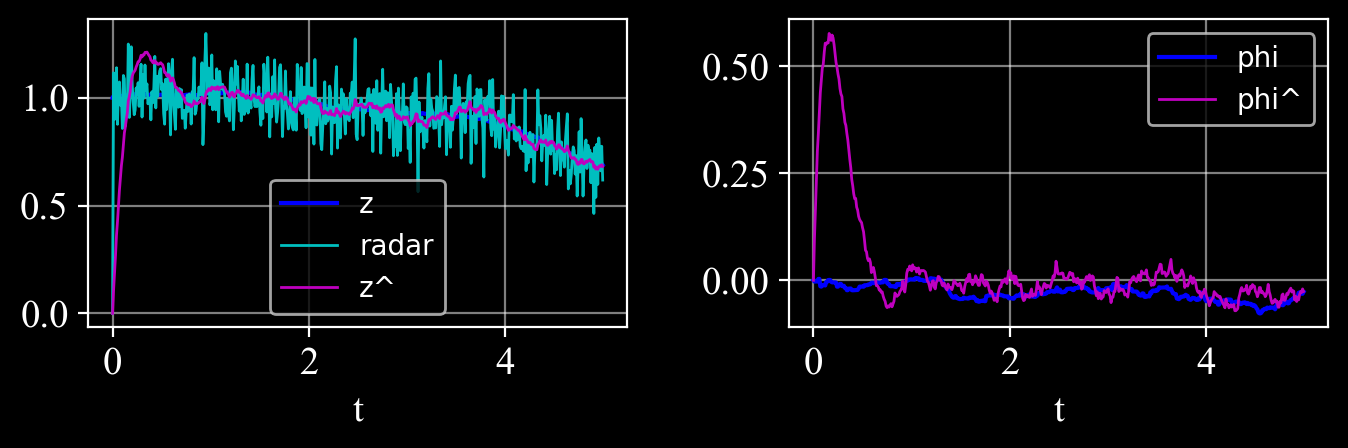

In [6]:
# import sys
# from c4dynamics.eqm.derivs import eqm3, eqm6 
import numpy as np 
import os, sys
# print(os.getcwd())
from scipy.integrate import odeint
from matplotlib import pyplot as plt 

import socket
if socket.gethostname() != 'ZivMeri-PC':
  print('changing dir')
  os.chdir('\\\\192.168.1.244\\d\\gh_repo\\c4dynamics')

import numpy as np 
import c4dynamics as c4d 
from scipy.linalg import solve_discrete_are

dt = 0.01 
tf = 5
tspan = np.arange(0, tf, dt)  

vp1 = np.sqrt(.1)
vp2 = np.sqrt(1)
Q = np.diag([vp1**2, vp2**2])

vm  = np.sqrt(.01) 
R = vm**2 



A = np.array([[0, 5], [0, -0.5]])
b = np.array([0, -0.1])
c = np.array([1, 0])


''' 
for the relation between discrete and continuous quantities see simon 
chapter 1 pg 27 (48)
chapter 8 pp 231-232 (246-7)



F = exp(A*dt) ~ I + A*dt
G = F*(I-exp(-A*dt))*A^-1*b ~ b*dt 

Qc = Q/dt
Rc = R*dt

'''

# F = np.eye(len(A)) + A * dt
# g = b * dt
# H = np.atleast_2d(c)

# Qd = Q * dt
# Rd = R / dt

tgt = c4d.state(z = 1, phi = 0)

rdr = c4d.state(z = 0)
tgttrk = c4d.state(z = 0, phi = 0)

# Pc = solve_discrete_are(F.T, H.T, Qd, Rd)
# K = Pc @ H.T @ np.linalg.inv(H @ Pc @ H.T + Rd)
kf = c4d.filters.kalman(P0 = np.zeros((2, 2)), F = np.eye(len(A)) + A * dt
                          , Q = Q * dt, H = c, R = R / dt, b = b * dt
                            , dt = dt, steadystate = True)

def fdynamics(y, t, u = 0):
  return A @ y + b * u + np.sqrt(Q) @ np.random.randn(2, 1)


for t in tspan:
  
  tgt.store(t)
  tgttrk.store(t)
  rdr.store(t)

  tgt.X = odeint(fdynamics, tgt.X, [t, t + dt], args = (tgttrk.z, ))[-1]  
  rdr.z = tgt.z + vm * np.random.randn()

  # tgttrk.X += (A @ tgttrk.X + b.flatten() * tgttrk.z + K * (rdr.z - H @ tgttrk.X)) * dt
  # tgttrk.X  =  F @ tgttrk.X + g.flatten() * tgttrk.z + K.flatten() * (rdr.z - H @ tgttrk.X)
  tgttrk.z, tgttrk.phi = kf.update(kf.predict([tgttrk.z, tgttrk.phi], u = tgttrk.z), rdr.z)



# pdb.set_trace()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (8, 2) 
                    , gridspec_kw = {'hspace': 0.5, 'wspace': 0.3})

ax[0].plot(*tgt.data('z'), 'b', linewidth = 1.5, label = 'z')
ax[0].plot(*rdr.data('z'), 'c', linewidth = 1, label = 'radar')
ax[0].plot(*tgttrk.data('z'), 'm', linewidth = 1, label = 'z^')
c4d.plotdefaults(ax[0], '', 't', '')
ax[0].legend()

ax[1].plot(*tgt.data('phi'), 'b', linewidth = 1.5, label = 'phi') # r'$\\varphi$'
ax[1].plot(*tgttrk.data('phi'), 'm', linewidth = 1, label = 'phi^') # r'$\\hat{\\varphi}$'
c4d.plotdefaults(ax[1], '', 't', '')
ax[1].legend()